In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

import os

In [140]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
DATASET_PATH = '/home/ayagudin/dl/probabilistic-time-series/lobster-trades-quotes/INTC/'
sorted(os.listdir(DATASET_PATH))[:4]

['INTC_2015-01-02_34200000_57600000_message_10.csv',
 'INTC_2015-01-02_34200000_57600000_orderbook_10.csv',
 'INTC_2015-01-05_34200000_57600000_message_10.csv',
 'INTC_2015-01-05_34200000_57600000_orderbook_10.csv']

In [46]:
from data_utils import get_daily_metadata

In [47]:
message_per_day, orderbook_per_day = get_daily_features()

  0%|          | 0/40 [00:00<?, ?it/s]

In [142]:
days = sorted(list(message_per_day.keys()))
for day in days:
    assert len(message_per_day[day]) == len(orderbook_per_day[day])

In [143]:
message_per_day['2015-01-02']

,0,1,2,3,4,5
0,34200.014991,5,0,200,367200,1
1,34200.015520,5,0,100,367200,1
2,34200.015920,3,7369837,300,365200,1
3,34200.015920,1,7378018,300,363200,1
4,34200.016722,5,0,100,367200,1
...,...,...,...,...,...,...
887624,57599.992160,3,267878306,1000,363600,-1
887625,57599.992175,3,267878313,1000,363700,-1
887626,57599.992177,3,267878321,1000,363800,-1
887627,57599.992299,3,267975279,300,363600,-1


In [144]:
orderbook_per_day['2015-01-02']

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,367300,4000,365200,400,367500,200,364800,300,367900,300,...,361800,200,372900,1000,361500,200,373400,2500,360800,200
1,367300,4000,365200,400,367500,200,364800,300,367900,300,...,361800,200,372900,1000,361500,200,373400,2500,360800,200
2,367300,4000,365200,100,367500,200,364800,300,367900,300,...,361800,200,372900,1000,361500,200,373400,2500,360800,200
3,367300,4000,365200,100,367500,200,364800,300,367900,300,...,362900,200,372900,1000,361800,200,373400,2500,361500,200
4,367300,4000,365200,100,367500,200,364800,300,367900,300,...,362900,200,372900,1000,361800,200,373400,2500,361500,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887624,363600,44800,363500,87619,363700,72300,363400,85300,363800,28900,...,362800,8200,364400,54500,362700,13200,364500,17300,362600,5800
887625,363600,44800,363500,87619,363700,71300,363400,85300,363800,28900,...,362800,8200,364400,54500,362700,13200,364500,17300,362600,5800
887626,363600,44800,363500,87619,363700,71300,363400,85300,363800,27900,...,362800,8200,364400,54500,362700,13200,364500,17300,362600,5800
887627,363600,44500,363500,87619,363700,71300,363400,85300,363800,27900,...,362800,8200,364400,54500,362700,13200,364500,17300,362600,5800


In [250]:
from data_utils import get_l2_snapshots, get_order_books, get_trades_features, get_features, Feature, DIRECTIONS, get_mid_price_target, get_features_and_targets

In [176]:
l2_snapshots, indices = get_l2_snapshots(message_per_day, orderbook_per_day, '2015-01-02')

In [ ]:
books = get_order_books(l2_snapshots)

In [178]:
print(books[0])

price  / amount
369000 / 200
368900 / 4500
368800 / 200
368500 / 700
368000 / 400
367700 / 200
367500 / 400
367400 / 100
367300 / 300
367000 / 400
----------
365200 / 100
365100 / 400
365000 / 700
364900 / 200
364800 / 300
364700 / 400
364500 / 300
364200 / 300
363600 / 100
363500 / 400



In [186]:
trade_amounts, turnovers = get_trades_features(message_per_day['2015-01-02'], indices)

In [196]:
feature = Feature(books[0], books[1], {dir: trade_amounts[dir][0] for dir in DIRECTIONS}, {dir: turnovers[dir][0] for dir in DIRECTIONS}).get_features()


In [201]:
features = get_features(books, trade_amounts, turnovers)

In [202]:
features.shape

(46797, 27)

In [205]:
get_features(books, trade_amounts, turnovers)

array([[1.8000000e+03, 2.0000000e+02, 4.5000000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.0000000e+02, 2.0000000e+02, 6.0000000e+02, ..., 8.0650000e+08,
        6.0000000e+02, 2.2002000e+08],
       [4.0000000e+02, 2.0000000e+02, 2.0000000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+02, 5.3000000e+03, 1.1300000e+04, ..., 1.4540000e+08,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+02, 7.4000000e+03, 1.7500000e+04, ..., 6.2522000e+08,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+02, 3.1700000e+04, 6.2200000e+04, ..., 2.1232035e+09,
        0.0000000e+00, 0.0000000e+00]])

In [242]:
targets = get_mid_price_target(books, 80)

In [246]:
len(message_per_day)

20

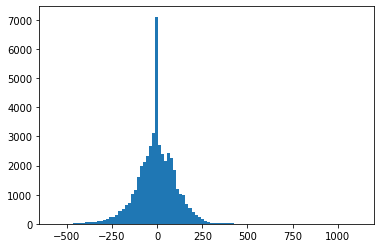

In [247]:
plt.hist(targets, bins=100);

In [230]:
mid_prices = [book.mid_price() for book in books]

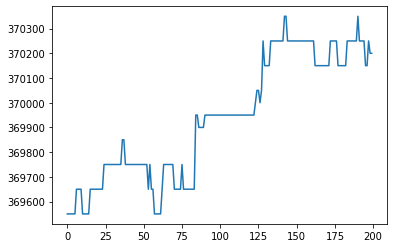

In [239]:
plt.plot(mid_prices[800:1000])

In [ ]:
features_per_day, targets_per_day = get_features_and_targets(message_per_day, orderbook_per_day)

  0%|          | 0/20 [00:00<?, ?it/s]